In [1]:
# importing necesscary packages

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [3]:
data1=pd.read_csv("Pima_Indians_Diabetes/diabetes.csv")
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data2=pd.read_csv("heart_disease/heart.csv")
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
#Age, BMI, Glucose, cp, ca, chol, trestbps and fbs 

In [6]:
df = data1.join(data2)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age,...,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,6,148,72,35,0,33.6,0.627,50,1,52,...,212,0,1,168,0,1.0,2,2,3,0
1,1,85,66,29,0,26.6,0.351,31,0,53,...,203,1,0,155,1,3.1,0,0,3,0
2,8,183,64,0,0,23.3,0.672,32,1,70,...,174,0,1,125,1,2.6,0,0,3,0
3,1,89,66,23,94,28.1,0.167,21,0,61,...,203,0,1,161,0,0.0,2,1,3,0
4,0,137,40,35,168,43.1,2.288,33,1,62,...,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,58,...,283,1,0,162,0,1.0,2,0,2,1
764,2,122,70,27,0,36.8,0.340,27,0,63,...,187,0,0,144,1,4.0,2,2,3,0
765,5,121,72,23,112,26.2,0.245,30,0,57,...,335,0,1,143,1,3.0,1,1,3,0
766,1,126,60,0,0,30.1,0.349,47,1,57,...,335,0,1,143,1,3.0,1,1,3,0


In [7]:
df=df.drop(columns =['Pregnancies', 'BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction','age','restecg','thalach','exang','oldpeak','slope','thal','sex','target'])
df.rename(columns = {'Outcome':'PCOS'}, inplace = True) 

In [8]:
df

,Glucose,BMI,Age,PCOS,cp,trestbps,chol,fbs,ca
0,148,33.6,50,1,0,125,212,0,2
1,85,26.6,31,0,0,140,203,1,0
2,183,23.3,32,1,0,145,174,0,0
3,89,28.1,21,0,0,148,203,0,1
4,137,43.1,33,1,0,138,294,1,3
...,...,...,...,...,...,...,...,...,...
763,101,32.9,63,0,3,150,283,1,0
764,122,36.8,27,0,0,140,187,0,2
765,121,26.2,30,0,0,110,335,0,1
766,126,30.1,47,1,0,110,335,0,1


In [9]:
df.to_csv('finaldataset.csv')

In [10]:
# loading data and EDA

data=pd.read_csv("finaldataset.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)

In [11]:
data.head(5)

,Glucose,BMI,Age,PCOS,cp,trestbps,chol,fbs,ca
0,148,33.6,50,1,0,125,212,0,2
1,85,26.6,31,0,0,140,203,1,0
2,183,23.3,32,1,0,145,174,0,0
3,89,28.1,21,0,0,148,203,0,1
4,137,43.1,33,1,0,138,294,1,3


<Axes: >

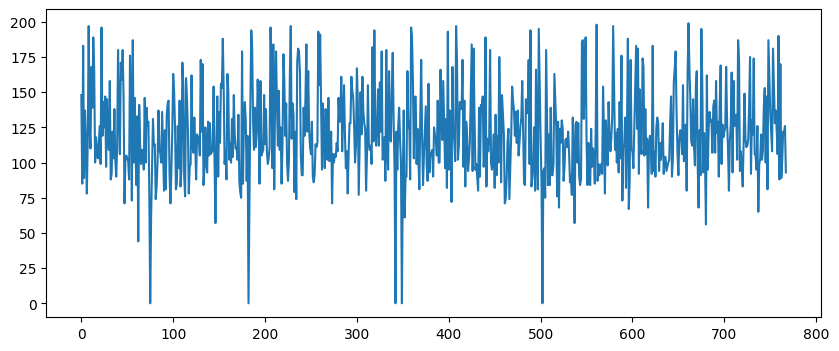

In [12]:
data['Glucose'].plot(figsize=(10,4))

<Axes: ylabel='Density'>

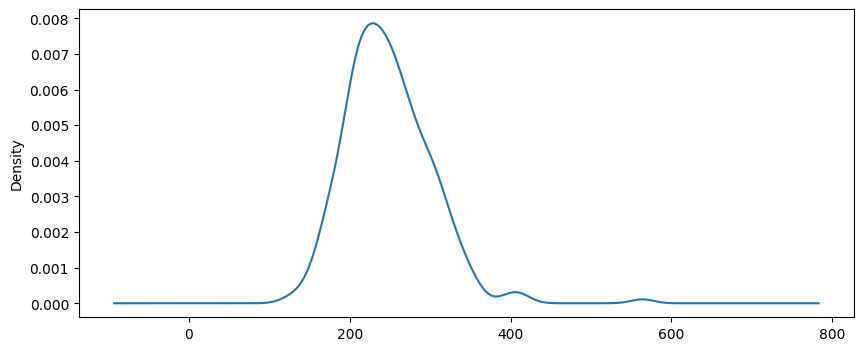

In [13]:
data['chol'].plot(figsize=(10,4),kind= 'kde')

In [14]:
x=data.drop(['PCOS',],axis=1)
y=data.PCOS

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(x,y,random_state=104,test_size=0.25,shuffle=True)

In [16]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion="entropy")

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('confusion matrix',confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))

confusion matrix [[102  26]
 [ 21  43]]
Accuracy: 0.7552083333333334
F1 score: 0.6466165413533834
Recall: 0.671875
Precision: 0.6231884057971014


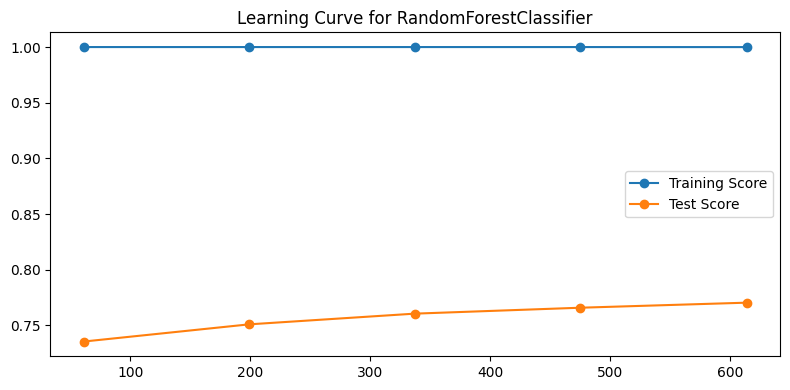

In [17]:

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit


fig, ax = plt.subplots(figsize=(8,4))

common_params = {
    "estimator": clf,
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "scoring": "accuracy",
    "n_jobs": 10,
}


train_sizes, train_scores, test_scores = learning_curve(**common_params)

# Plot the learning curve
ax.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score", marker="o")
ax.plot(train_sizes, np.mean(test_scores, axis=1), label="Test Score", marker="o")

ax.legend()
ax.set_title(f"Learning Curve for {clf.__class__.__name__}")

plt.tight_layout()
plt.show()


In [18]:
#Gradient Boosting algorithm

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=1)
gbc.fit(X_train, np.ravel(y_train, order='C'))
y_pred = gbc.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('confusion matrix',confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))


confusion matrix [[110  18]
 [ 25  39]]
Accuracy: 0.7760416666666666
F1 score: 0.6446280991735537
Recall: 0.609375
Precision: 0.6842105263157895


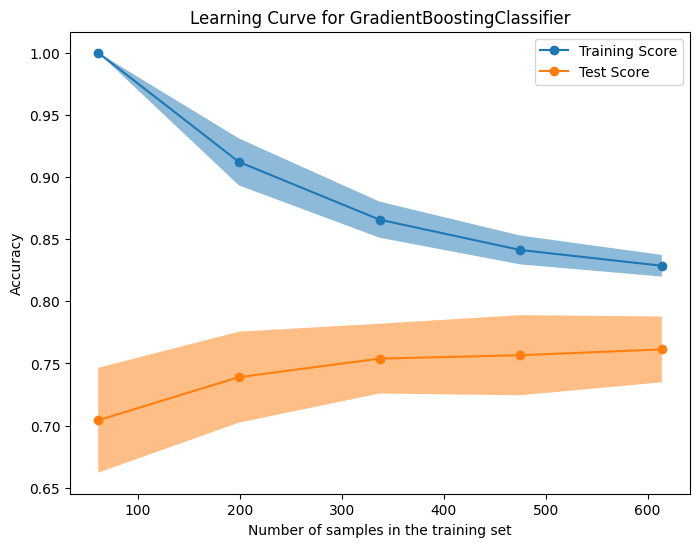

In [19]:
# learning curve for gradient boosting algorithm

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(figsize=(8, 6))

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for estimator in [gbc]:
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {estimator.__class__.__name__}")

plt.show()

In [20]:
# k nearest neighbour algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score


print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))

Accuracy: 0.734375
F1 score: 0.5565217391304348
Recall: 0.5
Precision: 0.6274509803921569


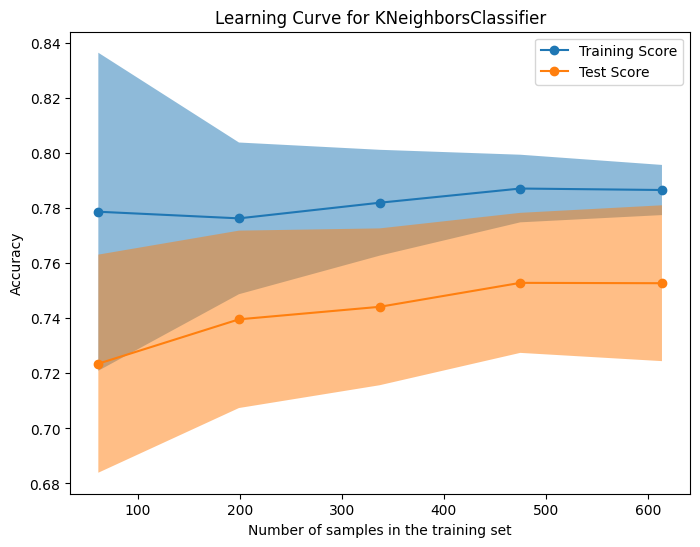

In [21]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(figsize=(8, 6))

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for estimator in [knn]:
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {estimator.__class__.__name__}")

plt.show()


In [22]:
#Logistic regression

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(max_iter=3000)
log_model.fit(X_train,y_train)


#predict
y_pred=log_model.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('confusion matrix',confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))


confusion matrix [[101  27]
 [ 23  41]]
Accuracy: 0.7395833333333334
F1 score: 0.6212121212121212
Recall: 0.640625
Precision: 0.6029411764705882


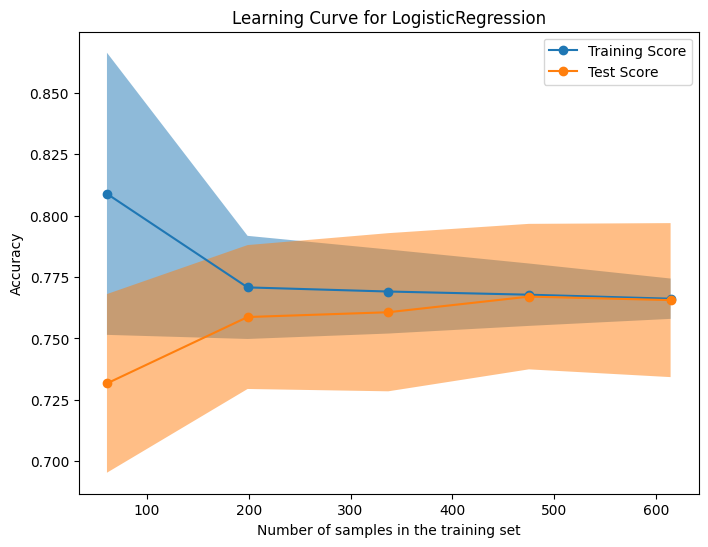

In [23]:
#learning curve for logistic regression

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(figsize=(8, 6))

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for estimator in [log_model]:
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {estimator.__class__.__name__}")

plt.show()

In [24]:
# SVM classifier

from sklearn.svm import SVC
svm = SVC(kernel='linear')


svm.fit(X_train, y_train)

y_pred=svm.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('confusion matrix',confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))



confusion matrix [[104  24]
 [ 24  40]]
Accuracy: 0.75
F1 score: 0.625
Recall: 0.625
Precision: 0.625


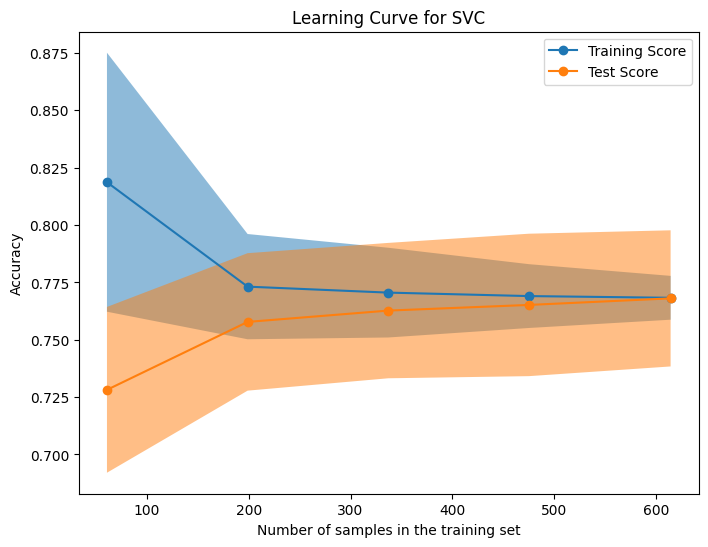

In [25]:
# learning curve for SVM

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(figsize=(8, 6))

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for estimator in [svm]:
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {estimator.__class__.__name__}")

plt.show()

In [26]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Model Accuracy
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('confusion matrix',confusion_matrix(y_test,y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))



confusion matrix [[90 38]
 [20 44]]
Accuracy: 0.6979166666666666
F1 score: 0.6027397260273972
Recall: 0.6875
Precision: 0.5365853658536586


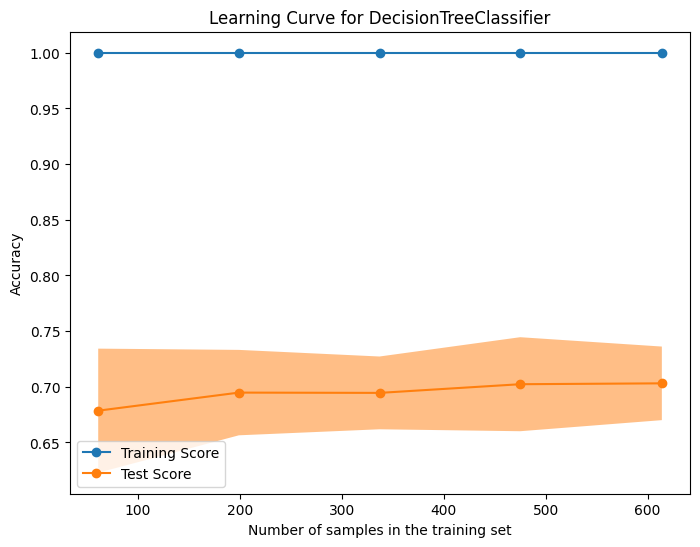

In [27]:
#learning curve for decision tree

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(figsize=(8, 6))

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for estimator in [dtree]:
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {estimator.__class__.__name__}")

plt.show()

In [28]:
# hybrid RFLR -> Random Forest and Logistic Regression

import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegression
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit a hybrid random forest logistic regression model
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Use the random forest to generate new features for logistic regression
rf_features = rf.apply(X_train)
X_train_new = X_train.copy()
X_train_new = np.concatenate((X_train_new, rf_features), axis=1)

# Fit a logistic regression model on the new features
lr = LogisticRegression(random_state=42)
lr.fit(X_train_new, y_train)

# Use the random forest and logistic regression models to make predictions on the test set
rf_features_test = rf.apply(X_test)
X_test_new = X_test.copy()
X_test_new = np.concatenate((X_test_new, rf_features_test), axis=1)
y_pred = lr.predict(X_test_new)

# Evaluate the accuracy of the model
acc = accuracy_score(y_test, y_pred)

print("Accuracy:",acc)
print('F1 score:', f1_score(y_test,y_pred ))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test,y_pred))

Accuracy: 0.7467532467532467
F1 score: 0.6486486486486487
Recall: 0.6545454545454545
Precision: 0.6428571428571429


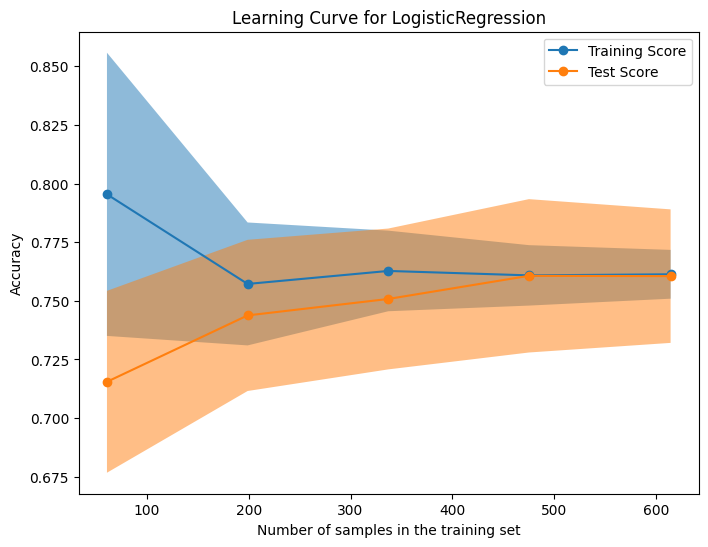

In [29]:
#learning curve for hybrid rflr

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figsize as needed

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 10,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for estimator in [lr]:
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
    handles, label = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ["Training Score", "Test Score"])
    ax.set_title(f"Learning Curve for {estimator.__class__.__name__}")

plt.show()

In [30]:
#KMEANS for clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(x)

from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=2): {silhouette_score(x,y_kmeans)}')

from sklearn.metrics import davies_bouldin_score
print(f'davies_bouldin_score(n=2): {davies_bouldin_score(x,y_kmeans)}')

Silhouette Score(n=2): 0.34864147765483083
davies_bouldin_score(n=2): 1.0961126203835632


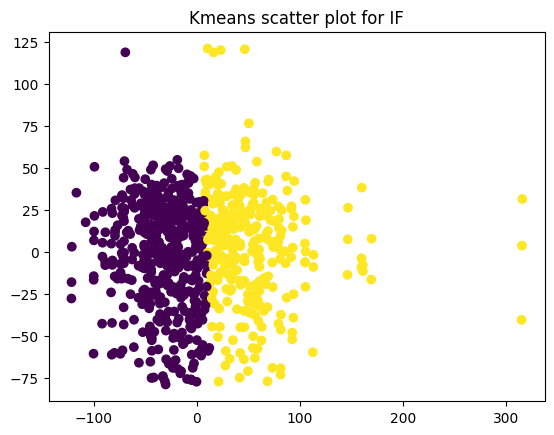

In [31]:
#scatter plot for Kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pcaval= pca.fit_transform(data)

kmeans = KMeans(n_clusters=2)
kmeans.fit(pcaval)
xpca=pcaval[:,0]
ypca=pcaval[:,1]

plt.scatter(xpca,ypca, c=kmeans.labels_)
plt.title("Kmeans scatter plot for IF")
plt.show()

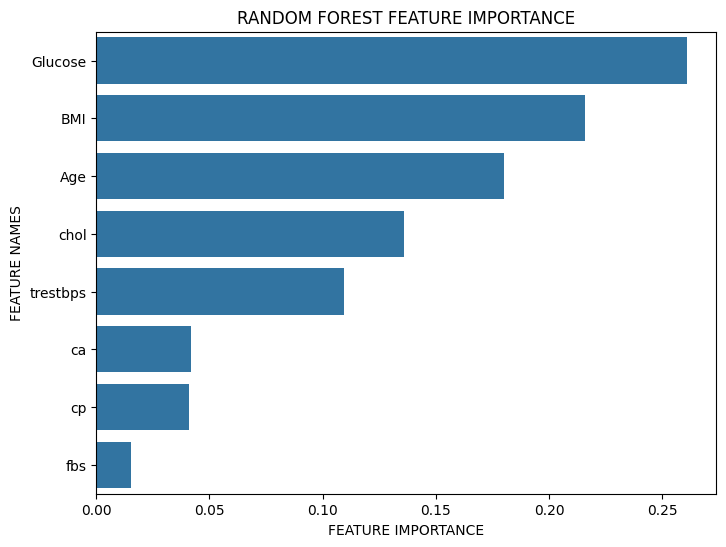

In [32]:
# Feature importance plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance, names, model_type):

    if isinstance(names, np.ndarray):
        names = names.tolist()
    # Create a DataFrame using a Dictionary
    data = {'feature_names': names, 'feature_importance': importance}
    fi_df = pd.DataFrame(data)

    # Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(8, 6))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    # Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


X_train = data.drop('PCOS', axis=1)
X_train_columns = X_train.columns.tolist()

plot_feature_importance(clf.feature_importances_, X_train_columns, 'RANDOM FOREST')


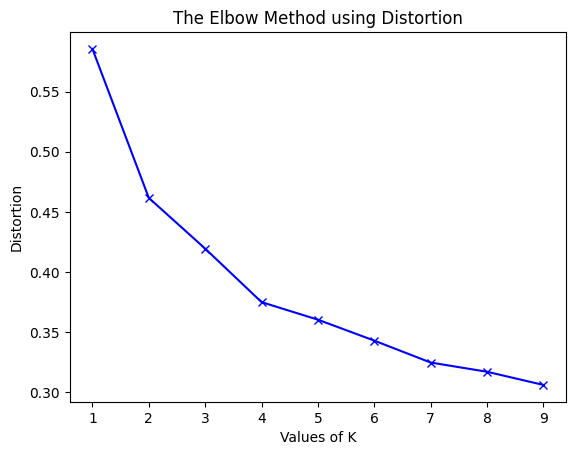

In [33]:
# Elbow plot for determining the number of clusters
import warnings
warnings.filterwarnings("ignore")

from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:

    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)

    distortions.append(((sum(np.min(cdist(x, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / x.shape[0])/100))
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()